In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
diabetes = load_diabetes()

In [5]:
diabetes.data[0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [6]:
diabetes.target[:3]

array([151.,  75., 141.])

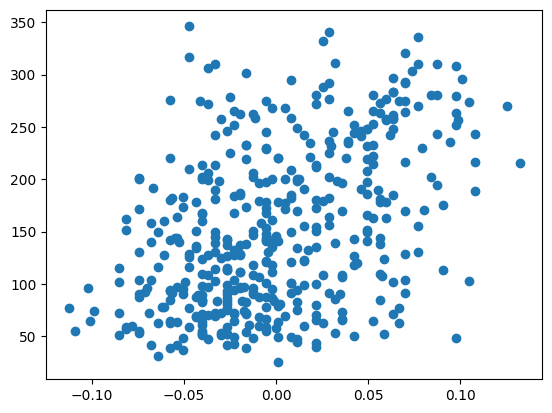

In [15]:
import matplotlib.pyplot as plt

plt.scatter(diabetes.data[:,3],diabetes.target)
plt.show()

In [16]:
# 상관계수
np.corrcoef(diabetes.data[:,3],diabetes.target)

array([[1.        , 0.44148176],
       [0.44148176, 1.        ]])

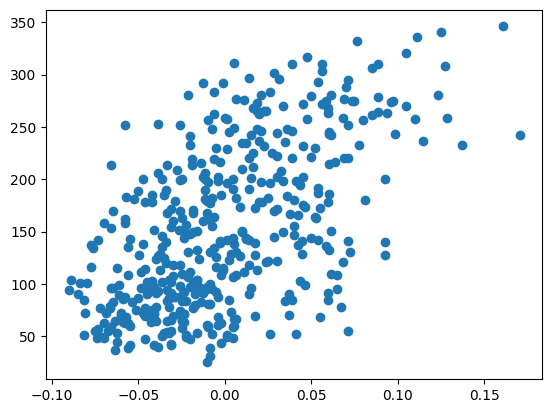

In [17]:
plt.scatter(diabetes.data[:,2],diabetes.target)
plt.show()

In [18]:
# 상관계수
np.corrcoef(diabetes.data[:,2],diabetes.target)

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

> 2번째 타겟으로 경사하강법 진행

---
### 경사하강법
- 경사하강법은 모델이 데이터를 잘 표현할 수 있도록 기울기 (변화율)를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘 (Optimizing Algorithm)

### 예측값과 변화율 
변화율 = 0: 최적화된 모델, 이에 해당하는 가중치를 찾아야 함     
y - y^ = 0

### 예측값 (Y^)
예측값은 하나의 모델에서 수식의 결과로 나온 값. (예측값이 정답값으로 수렴하게 만든다.)

---
### 훈련데이터에서 잘 맞는 w와 b를 찾는 방법
1. 무작위로 w와 b를 정한다.
2. x에서 샘플 하나를 선택하여 y^을 계산한다.
3. y^과 선택한 샘플의 진짜 y를 비교한다
   1. 오차 구하기
4. y^이 y와 가까워지도록 w, b를 조정한다. (모델 조정하기: 학습하기)
5. 모든 샘플을 처리할 때 까지 (2)~(4)항목을 반복한다.

In [20]:
# 훈련데이터의 Feature과 Target 정하기
x = diabetes.data[:,2]
y = diabetes.target

# 5개만 출력해보기
print(x[:5])
print(y[:5])

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]
[151.  75. 141. 206. 135.]


In [21]:
# w와 b를 초기화하기: 무작위로 그냥 weight와 bias를 1로 선택
w = 1.0
b = 1.0

In [22]:
# 훈련 데이터의 첫번째 Sample 데이터로 y^ 계산하기
y_hat = x[0] * w + b
y_hat

1.0616962065186832

In [24]:
# Target과 예측데이터 비교하기
print(y_hat)
print(y[0])

1.0616962065186832
151.0


> Target과 예측값 간 너무 많은 차이가 (오차가) 발생 <- 당연한 결과임

### 경사하강법 (w값을 조절하기)
: w와 b를 조금씩 변경해서 y_hat이 증가하는지 감소하는지 살펴보기    

In [25]:
# 기존 w에 0.1만 증가해보기
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc

1.0678658271705517

In [29]:
# w값 조정한 후 예측값 정도 확인하기
# w가 0.1 증가했을 때 y_hat이 얼마나 증가했는지 계산해보자 (변화율 확인하기)
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.06169620651868429

> w_rate (변화율)이 x[0]의 값과 동일하다

In [31]:
# 기존 w에 0.1만 증가해보기
w_inc = w + 0.2
y_hat_inc = w_inc * x[0] + b
y_hat_inc

# w값 조정한 후 예측값 정도 확인하기
# w가 0.2 증가했을 때 y_hat이 얼마나 증가했는지 계산해보자 (변화율 확인하기)
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.06169620651868325

In [32]:
w_inc = w + 0.1
y_hat = w * x[1] + b
y_hat_inc = w_inc * x[1] + b
y_hat_inc

w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

-0.05147406123880089

In [34]:
# 변화율에 대한 증명이 끝났으니 다시 훈련데이터의 1번째 값으로 변화율을 구해보자
w = b = 1
y_hat = w * x[0] + b
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.06169620651868429

In [35]:
# 변화율로 가중치를 업데이트하기 <- 학습하기
w_new = w + w_rate
w_new

1.0616962065186843

In [38]:
# 변화율로 절편 업데이트하기 <- 학습하기
b_inc = b + 0.1
y_hat_inc = w * x[0] + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc-y_hat)/(b_inc-b)
print(b_rate)

1.1616962065186833
1.0


### 오차 역전파 (backpropagation)

In [39]:
# 오차 역전파로 가중치와 절편을 업데이트한다. (손실함수 (=비용함수, cost function)를 구성함)
# 오차 역전파는 y^과 y의 차이를 비용하여 w와 b를 업데이트한다.
# 오차와 변화율을 곱하여 가중치를 업데이트한다.
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + b_rate * err
print(w_new)
print(b_new)

10.250624555903848
150.9383037934813


In [42]:
print(x[0]*w_new + b_new)
print(y[0])

151.57072844302783
151.0


In [63]:
# 2번째 샘플 x[1]을 사용하여 오차를 구하고 새로운 w와 b를 구하기
y_hat = w_new * x[1] + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.12203276403923 75.72744778243177


# 반복문을 통해 전체 샘플을 반복하기

In [67]:
w=b=1

for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w,b)

587.8654539985616 99.4093556453094


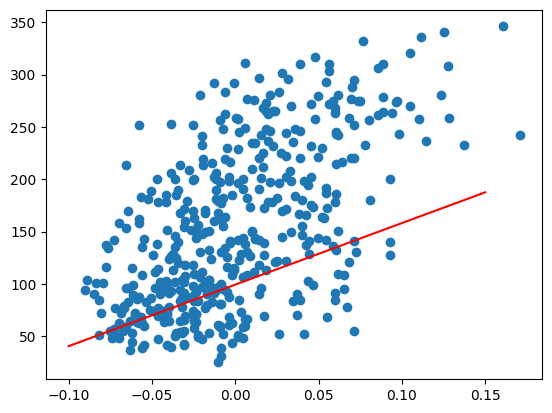

In [68]:
# 그래프로 확인하기
plt.scatter(
    x,
    y
)

# 산포도와 x축에 범위에 해당하는 값을 대입
pt1 = (-0.1,-0.1*w+b)
pt2 = (0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],c='red')
plt.show()

### Epoch로 반복하기: w와 b를 반복적으로 계산하기

In [73]:
# 100번 반복
w=b=1
for _ in range(100):
    for x_i, y_i in zip(x,y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w,b)

913.5973364346786 123.39414383177173


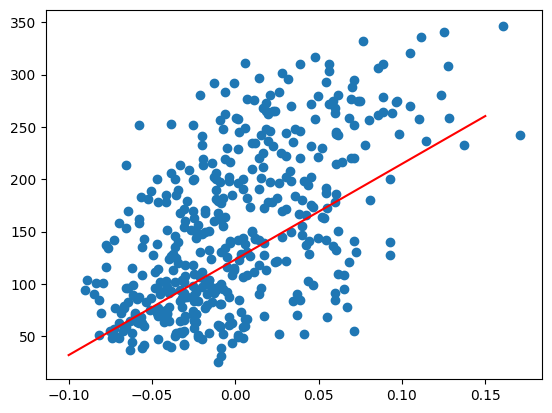

In [74]:
# 그래프로 확인하기
plt.scatter(
    x,
    y
)

# 산포도와 x축에 범위에 해당하는 값을 대입
pt1 = (-0.1,-0.1*w+b)
pt2 = (0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],c='red')
plt.show()

In [75]:
# 1000번 반복
w=b=1
for _ in range(1000):
    for x_i, y_i in zip(x,y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w,b)

913.5973364346786 123.39414383177173


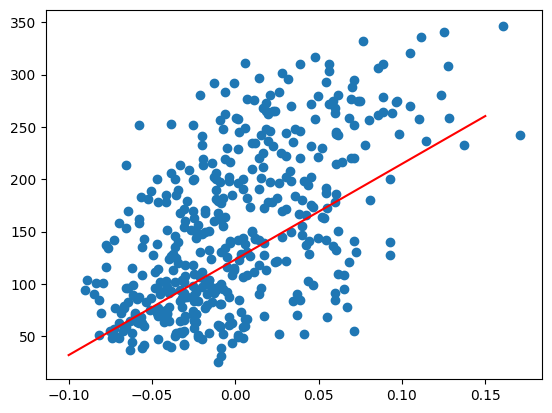

In [76]:
# 그래프로 확인하기
plt.scatter(
    x,
    y
)

# 산포도와 x축에 범위에 해당하는 값을 대입
pt1 = (-0.1,-0.1*w+b)
pt2 = (0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],c='red')
plt.show()

> 100번 반복한 결과와 1000번 반복한 결과가 동일하다 = 최솟값 (global minimum)을 찾았다 (미분계수가 0이다)

---
### 모델 만들기 정리
1. w와 b를 임의의 값 (1,1)로 초기화하고 훈련데이터의 샘플을 하나씩 대입하여 y와 y^의 오차를 구한다.
2. 1에서 구한 오차를 w와 b의 변화율에 곱하고 이 값을 이용하여 w와 b를 업데이트한다. (학습한다)
3. 만약 y^이 y보다 커지는 오차는 음수가 되어 자동으로 w와 b가 줄어드는 방향으로 업데이트된다.
4. 반대로 y^이 y보다 작으면 오차는 양수가 되어 w와 b가 더 커지도록 업데이트된다.

---
### 선형 회귀를 위한 Class 만들기

In [77]:
class LRModel:
    # 초기화작업
    def __init__(self):
        self.w = 1.0 # 가중치 초기화
        self.b = 1.0 # 절편 초기화
    
    # 정방향 계산
    def forpass(self,x):
        y_hat = x * self.w + self.b # 직선방정식을 계산
        return y_hat
    
    # 역방향 계산 (오차율이 들어감)
    def backprop(self,x,err):
        w_grad = x * err # 가중치에 대한 그래디언트
        b_grad = 1 * err # 절편에 대한 그래디언트를 계산
        return w_grad, b_grad
    
    # 훈련
    def fit(self,x,y,epoch): # w와 b는 처음에만 1로 초기화되고 epoch의 크기에 따라 계속 바뀐다.
        for _ in range(epoch):
            for x_i, y_i in zip(x,y):
                y_hat = self.forpass(x_i)
                err = y_i - y_hat
                w_grad, b_grad = self.backprop(x_i,err)
                self.w += w_grad
                self.b += b_grad
        return self.w, self.b

In [78]:
lrmodel = LRModel()
w, b = lrmodel.fit(x,y,100)
print(w,b)

913.5973364346786 123.39414383177173


---
# 용어 정리
### 선형회귀
선형방정식을 사용하여 연속적인 값을 예측하는 알고리즘으로 데이터를 가장 잘 표현하는 방정식의 계수를 구할 수 있습니다.   
머신러닝 알고리즘이지만 딥러닝에서 사용하는 인공신경망의 알고리즘의 기초가 됩니다.  

### 경사하강법
최적화 알고리즘 중의 하나로 핵심 훈련 알고리즘입니다.   
이 방법은 최적의 모델을 만드는 가중치를 한 번에 찾지 않습니다.  
먼저 임의로 정한 가중치에서 출력을 만든 후 타깃과 비교하여 오차를 줄이는 방향으로 가중치를 조정합니다.  
이런 과정의 모든 훈련 샘플링에 대해서 반복 (epoch)하면서 최적의 가중치를 찾습니다.

### 손실함수 (비용함수; cost function 또는 목적함수; objective function)
모델이 얼마만큼의 오류가 있는지 측정하는 기준입니다.    
함수의 값을 최소로 만드는 것이 이 모델 훈련의 목적입니다.   


## 순서: 선형회귀 -> 로지스틱 회귀 -> 인공신경망 -> Deep Learning
- LogisticRegression은 이름과 달리 분류 알고리즘이므로 혼동에 주의할 것